<a href="https://colab.research.google.com/github/Mateusz-best-creator/MNIST_recognition_TensorFlow/blob/main/Chapter_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow_datasets as tfds

# Digits recognition

## Getting and Preprocessing data

In [29]:
from sklearn.model_selection import train_test_split

(X_full, y_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [23]:
def get_2_sets(X_full, y_full, factor=1):
  count = len(y_full) * factor
  X_train, X_valid, y_train, y_valid = train_test_split(X_full[:count], y_full[:count], test_size=0.1, random_state=42)
  print(X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape)
  return X_train, X_valid, y_train, y_valid

In [24]:
def preprocess_data(features):
  features = tf.cast(features, dtype=tf.float32)
  features = features / 255.
  features = tf.expand_dims(features, axis=-1)
  return features

In [32]:
X_train, X_valid, y_train, y_valid = get_2_sets(X_full, y_full)
X_train = preprocess_data(X_train)
X_valid = preprocess_data(X_valid)
X_test = preprocess_data(X_test)
X_test.dtype, X_test.numpy().max(), X_test.numpy().min()

(54000, 28, 28) (6000, 28, 28) (10000, 28, 28) (54000,) (6000,) (10000,)


(tf.float32, 1.0, 0.0)

In [79]:
def visualize_images(images, labels, n_rows=4, n_cols=4):
  n_images = n_rows*n_cols
  fig = plt.figure(figsize=(15, 10))

  for idx, image in enumerate(images[:n_images]):
    fig.add_subplot(n_rows, n_cols, idx+1)
    plt.imshow(image)
    plt.axis(False)
    plt.title(f"{labels[idx]}")
  plt.show()

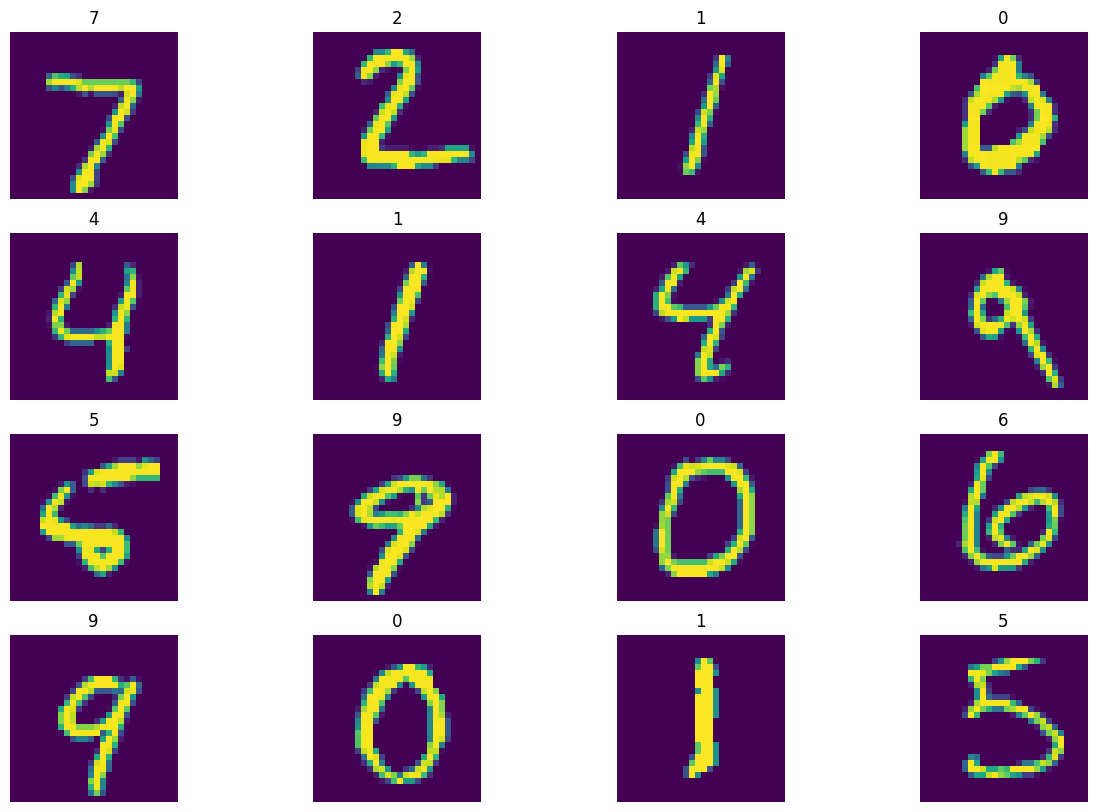

In [80]:
visualize_images(X_test, y_test)

In [33]:
def compile_train_model(model, epochs=10, X_train=X_train,
                        X_valid=X_valid, y_train=y_train, y_valid=y_valid):
  model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
  history = model.fit(X_train, y_train, epochs=10,
                      validation_data=(X_valid, y_valid))
  return history

## Start running series of modelling experiments

### Model_1

In [37]:
# Building model_1
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", input_shape=[28, 28, 1],
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(10, activation="softmax")
])
compile_train_model(model_1)
model_1_loss, model_1_accuracy = model_1.evaluate(X_test, y_test)
print(f"Model_1 accuracy: {model_1_accuracy*100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.1421 - accuracy: 0.9594
Model_1 accuracy: 95.94%


In [35]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 global_max_pooling2d_2 (Glo  (None, 64)               0         
 balMaxPooling2D)                                                
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________________________


### Model_2

**Building model_2.**

To this model we will add 1 dense layer and 1 dropout layer at the end our our model architecture.

In [39]:
# Building model_2
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", input_shape=[28, 28, 1],
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])
compile_train_model(model_2)
model_2_loss, model_2_accuracy = model_2.evaluate(X_test, y_test)
print(f"Model_2 accuracy: {model_2_accuracy*100:.2f}%")

Epoch 1/10
1688/1688 [==============================] - 12s 6ms/step - loss: 0.7613 - accuracy: 0.7492 - val_loss: 0.2835 - val_accuracy: 0.9152
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3176 - accuracy: 0.9024 - val_loss: 0.2242 - val_accuracy: 0.9273
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2572 - accuracy: 0.9206 - val_loss: 0.1766 - val_accuracy: 0.9393
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2262 - accuracy: 0.9306 - val_loss: 0.1580 - val_accuracy: 0.9480
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2021 - accuracy: 0.9384 - val_loss: 0.1726 - val_accuracy: 0.9467
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1861 - accuracy: 0.9431 - val_loss: 0.1320 - val_accuracy: 0.9588
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1720 - accuracy: 0.9477 - val_loss: 0.1598 - val_accura

In [40]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 global_max_pooling2d (Globa  (None, 64)               0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

### Model_3

**Model_3**

In this model instead of suing GlobalMaxPooling we are going to use MaxPool2D layer and Flatten layer with dropout for regularization.

In [48]:
# Building model_3
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model_3 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", input_shape=[28, 28, 1],
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation="softmax")
])
compile_train_model(model_3)
model_3_loss, model_3_accuracy = model_3.evaluate(X_test, y_test)
print(f"Model_3 accuracy: {model_3_accuracy*100:.2f}%")

Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.2063 - accuracy: 0.9393 - val_loss: 0.0516 - val_accuracy: 0.9840
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0844 - accuracy: 0.9753 - val_loss: 0.0423 - val_accuracy: 0.9865
Epoch 3/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0624 - accuracy: 0.9810 - val_loss: 0.0381 - val_accuracy: 0.9890
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.0311 - val_accuracy: 0.9910
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0422 - accuracy: 0.9873 - val_loss: 0.0363 - val_accuracy: 0.9900
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0364 - accuracy: 0.9882 - val_loss: 0.0371 - val_accuracy: 0.9902
Epoch 7/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0345 - val_accurac

In [49]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dropout (Dropout)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                        

### Model_4

**Model_4**

In this model instead of using dropout for regularization we are going to use BatchNormalization.

In [51]:
# Building model_4
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model_4 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", input_shape=[28, 28, 1],
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation="softmax")
])
compile_train_model(model_4)
model_4_loss, model_4_accuracy = model_4.evaluate(X_test, y_test)
print(f"Model_4 accuracy: {model_4_accuracy*100:.2f}%")

Epoch 1/10
1688/1688 [==============================] - 13s 6ms/step - loss: 0.1170 - accuracy: 0.9642 - val_loss: 0.0616 - val_accuracy: 0.9830
Epoch 2/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0441 - accuracy: 0.9864 - val_loss: 0.0460 - val_accuracy: 0.9857
Epoch 3/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0299 - accuracy: 0.9909 - val_loss: 0.0483 - val_accuracy: 0.9848
Epoch 4/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0536 - val_accuracy: 0.9855
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.0494 - val_accuracy: 0.9877
Epoch 6/10
1688/1688 [==============================] - 9s 6ms/step - loss: 0.0133 - accuracy: 0.9955 - val_loss: 0.0512 - val_accuracy: 0.9877
Epoch 7/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.0411 - val_acc

In [52]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 batch_normalization (BatchN  (None, 12544)            50176     
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               1

### Model_5

**Model_5**

In this model we are going to stack multiple Convolutional and pooling layers on top of each other, after that we will use dense layer, and dropout layer (since it performs slightly better than batch normalization) for regularization.

In [55]:
# Building model_5
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model_5 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", input_shape=[28, 28, 1],
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation="softmax")
])

compile_train_model(model_5)
model_5loss, model_5_accuracy = model_5.evaluate(X_test, y_test)
print(f"Model_5 accuracy: {model_5_accuracy*100:.2f}%")

Epoch 1/10
1688/1688 [==============================] - 15s 7ms/step - loss: 0.2370 - accuracy: 0.9286 - val_loss: 0.0702 - val_accuracy: 0.9790
Epoch 2/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0841 - accuracy: 0.9758 - val_loss: 0.0452 - val_accuracy: 0.9875
Epoch 3/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0582 - accuracy: 0.9833 - val_loss: 0.0377 - val_accuracy: 0.9885
Epoch 4/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0456 - accuracy: 0.9871 - val_loss: 0.0311 - val_accuracy: 0.9912
Epoch 5/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0412 - accuracy: 0.9880 - val_loss: 0.0283 - val_accuracy: 0.9920
Epoch 6/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0357 - accuracy: 0.9893 - val_loss: 0.0283 - val_accuracy: 0.9932
Epoch 7/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0306 - accuracy: 0.9914 - val_loss: 0.0352 - val_ac

In [54]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

### Model_6

**Model_6**

In this model instead of using MaxPool2D and Flatten layer we are going to use MaxPool2D layer.

In [61]:
# Building model_6
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model_6 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", input_shape=[28, 28, 1],
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.GlobalMaxPooling2D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation="softmax")
])

compile_train_model(model_6)
model_6_loss, model_6_accuracy = model_6.evaluate(X_test, y_test)
print(f"Model_6 accuracy: {model_6_accuracy*100:.2f}%")

Epoch 1/10
1688/1688 [==============================] - 14s 6ms/step - loss: 0.4105 - accuracy: 0.8699 - val_loss: 0.0861 - val_accuracy: 0.9735
Epoch 2/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1241 - accuracy: 0.9642 - val_loss: 0.0575 - val_accuracy: 0.9823
Epoch 3/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0920 - accuracy: 0.9734 - val_loss: 0.0430 - val_accuracy: 0.9865
Epoch 4/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0760 - accuracy: 0.9779 - val_loss: 0.0344 - val_accuracy: 0.9910
Epoch 5/10
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0638 - accuracy: 0.9817 - val_loss: 0.0379 - val_accuracy: 0.9892
Epoch 6/10
1688/1688 [==============================] - 11s 6ms/step - loss: 0.0583 - accuracy: 0.9830 - val_loss: 0.0333 - val_accuracy: 0.9908
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0544 - accuracy: 0.9846 - val_loss: 0.0527 - val_ac

In [60]:
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

### Model_7

**Model_7 (last experiment)**

In this model we are going to add another stack of convolutional and pooling layers. We will also use MaxPool2D and Flatten layers instead of GlobalMaxPool2D since it performs slightly better.

In [62]:
# Building model_7
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model_7 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", input_shape=[28, 28, 1],
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same",
                          activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation="softmax")
])

compile_train_model(model_7)
model_7_loss, model_7_accuracy = model_7.evaluate(X_test, y_test)
print(f"Model_7 accuracy: {model_7_accuracy*100:.2f}%")

Epoch 1/10
1688/1688 [==============================] - 18s 8ms/step - loss: 0.2471 - accuracy: 0.9253 - val_loss: 0.0603 - val_accuracy: 0.9818
Epoch 2/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0703 - accuracy: 0.9809 - val_loss: 0.0457 - val_accuracy: 0.9878
Epoch 3/10
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0523 - accuracy: 0.9860 - val_loss: 0.0424 - val_accuracy: 0.9888
Epoch 4/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0429 - accuracy: 0.9882 - val_loss: 0.0373 - val_accuracy: 0.9887
Epoch 5/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0367 - accuracy: 0.9906 - val_loss: 0.0410 - val_accuracy: 0.9893
Epoch 6/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0341 - accuracy: 0.9914 - val_loss: 0.0277 - val_accuracy: 0.9933
Epoch 7/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0282 - accuracy: 0.9925 - val_loss: 0.0668 - val

**Note:** looks like this model still performs very well, however it isn't as good as our previous models, so maybe this architecture is to complex for our digits dataset.

In [63]:
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

## Comparing Experiments

In [64]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_model(model, X_test=X_test, y_true=y_test):
  y_pred = model.predict(X_test)
  y_pred = np.argmax(y_pred, axis=-1)

  accuracy = accuracy_score(y_true, y_pred)
  precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  return {
      "accuracy": accuracy,
      "precision": precision,
      "recall": recall,
      "f1_score": f1
  }

In [65]:
model_1_results = evaluate_model(model_1)
model_2_results = evaluate_model(model_2)
model_3_results = evaluate_model(model_3)
model_4_results = evaluate_model(model_4)
model_5_results = evaluate_model(model_5)
model_6_results = evaluate_model(model_6)
model_7_results = evaluate_model(model_7)
model_5_results

313/313 [==============================] - 1s 2ms/step


{'accuracy': 0.9937,
 'precision': 0.9937014822825798,
 'recall': 0.9937,
 'f1_score': 0.9936967622408496}

In [74]:
model_results = pd.DataFrame({"model_1": model_1_results,
                              "model_2": model_2_results,
                              "model_3": model_3_results,
                              "model_4": model_4_results,
                              "model_5": model_5_results,
                              "model_6": model_6_results,
                              "model_7": model_7_results}).T
model_results = model_results.sort_values(by=["f1_score"], ascending=False)
model_results

,accuracy,precision,recall,f1_score
model_5,0.9937,0.993701,0.9937,0.993697
model_6,0.9927,0.992715,0.9927,0.992700
model_3,0.9915,0.991512,0.9915,0.991498
model_7,0.9894,0.989527,0.9894,0.989403
model_4,0.9878,0.987807,0.9878,0.987794
model_2,0.9643,0.964781,0.9643,0.964223
model_1,0.9594,0.960730,0.9594,0.959477


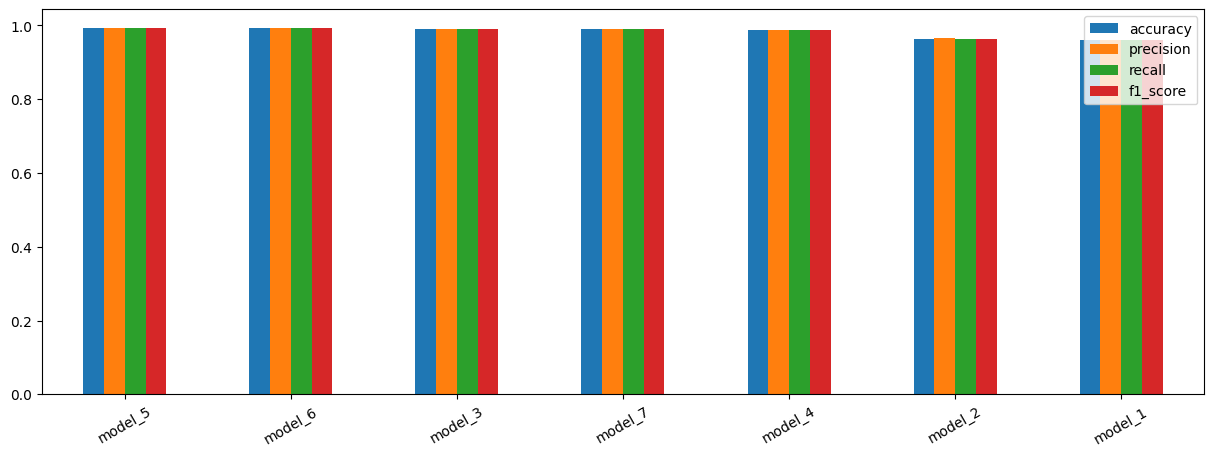

In [75]:
model_results.plot(kind="bar", rot=30, figsize=(15, 5));

### Creating confusion matrix (with our best performing model)

In [76]:
from sklearn.metrics import confusion_matrix

model_5_preds = np.argmax(model_5.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, model_5_preds)
pd.DataFrame(cm)

313/313 [==============================] - 1s 3ms/step


,0,1,2,3,4,5,6,7,8,9
0,973,0,0,0,1,0,3,1,1,1
1,0,1134,0,1,0,0,0,0,0,0
2,0,1,1027,1,0,0,1,1,1,0
3,0,0,0,1009,0,1,0,0,0,0
4,0,0,0,0,976,0,1,0,0,5
5,0,0,0,3,0,886,1,0,1,1
6,1,2,0,0,3,0,950,0,2,0
7,0,1,3,0,0,0,0,1024,0,0
8,1,1,2,1,0,1,0,1,965,2
9,0,0,1,0,5,2,0,6,2,993


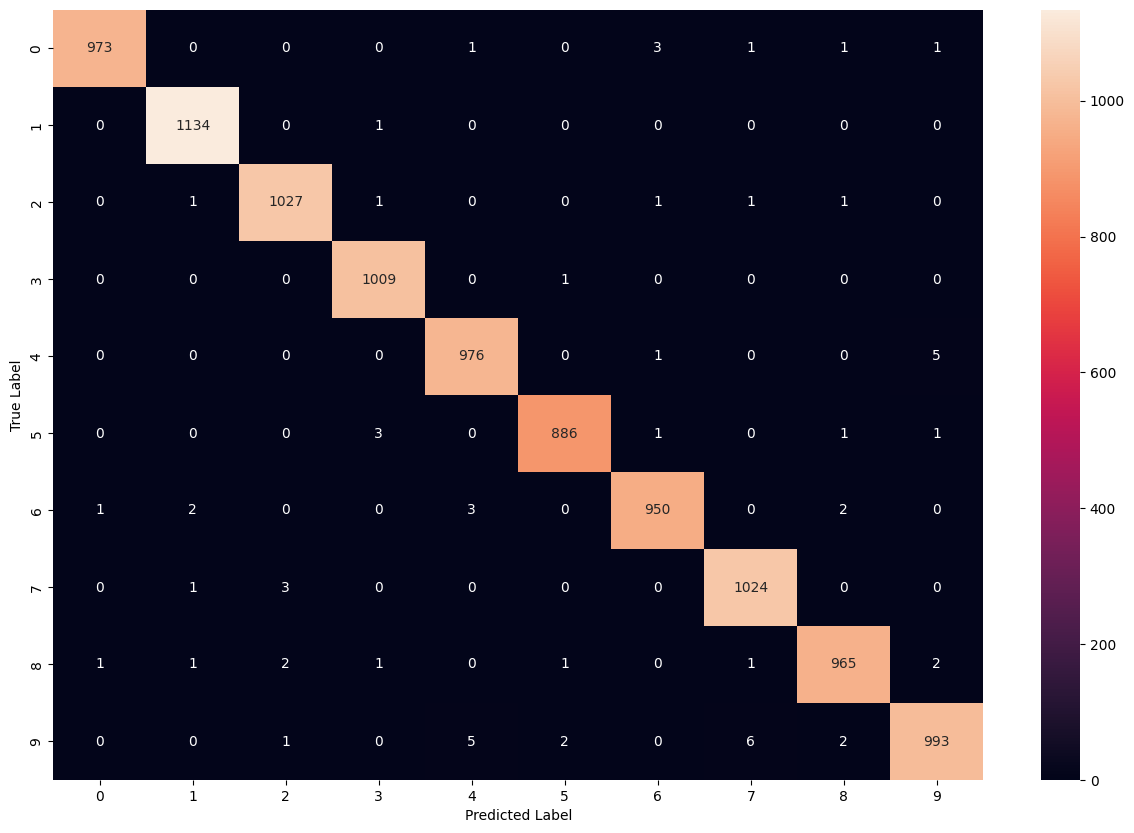

In [87]:
import seaborn as sns

plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(cm,
                      annot=True,
                      fmt='.0f')
plt.xlabel("Predicted Label")
plt.ylabel("True Label");

In [84]:
def visualize_model_preds(images, labels, model_preds, n_rows=4, n_cols=4):
  n_images = n_rows*n_cols
  fig = plt.figure(figsize=(15, 15))

  for idx, image in enumerate(images[:n_images]):
    fig.add_subplot(n_rows, n_cols, idx+1)
    plt.imshow(image)
    plt.axis(False)

    color = "green"
    predicted_label = model_preds[idx]
    if predicted_label != labels[idx]:
      color = "red"

    plt.title(f"True label: {labels[idx]}\nPredicted label: {model_preds[idx]}", color=color)
  plt.show()

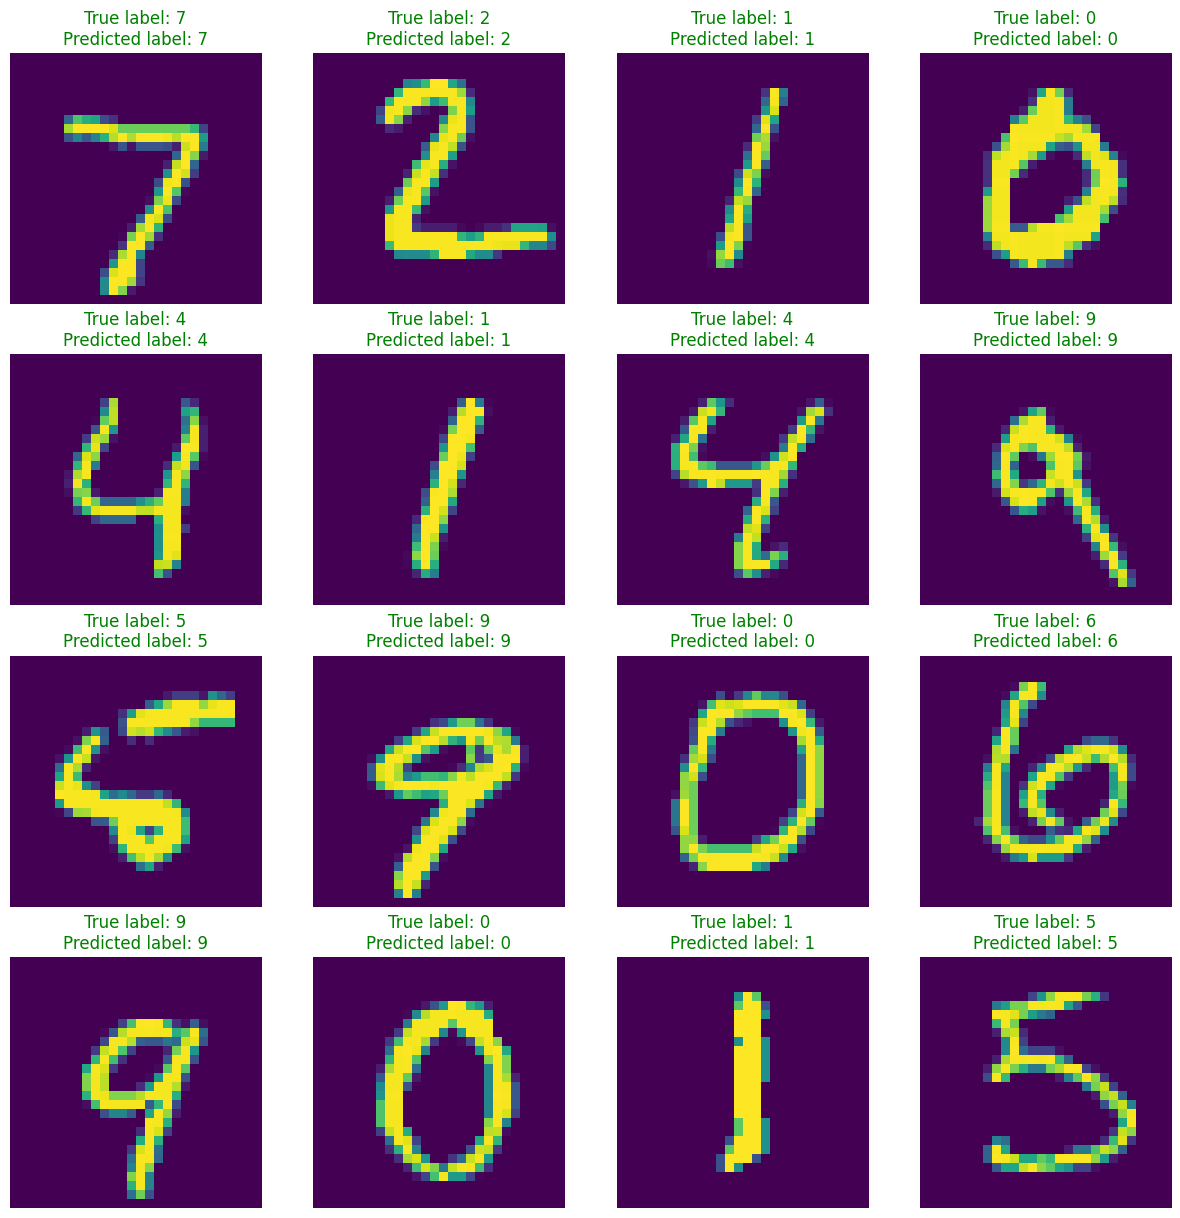

In [85]:
visualize_model_preds(X_test, y_test, model_5_preds)

### Finding the most wrong predictions

In [93]:
model_5_preds_probas = np.max(model_5.predict(X_test), axis=-1)
model_predictions = pd.DataFrame({"Index": range(len(X_test)),
                                  "True_label": y_test,
                                  "Predicted_label": model_5_preds,
                                  "Predicted_probability": model_5_preds_probas})
model_predictions["Is_correct"] = model_predictions["True_label"] == model_predictions["Predicted_label"]
model_predictions.head()

313/313 [==============================] - 1s 3ms/step


,Index,True_label,Predicted_label,Predicted_probability,Is_correct
0,0,7,7,1.0,True
1,1,2,2,1.0,True
2,2,1,1,1.0,True
3,3,0,0,1.0,True
4,4,4,4,1.0,True


In [95]:
most_wrong_predictions = model_predictions[model_predictions["Is_correct"] == False].sort_values(by="Predicted_probability")
top_16_most_wrong_predictions = most_wrong_predictions[:16]
top_16_most_wrong_predictions

,Index,True_label,Predicted_label,Predicted_probability,Is_correct
8527,8527,4,9,0.524132,False
2182,2182,1,3,0.527924,False
9792,9792,4,9,0.528748,False
2406,2406,9,4,0.530328,False
4078,4078,9,2,0.563291,False
4880,4880,0,8,0.599522,False
9692,9692,9,7,0.605960,False
326,326,2,1,0.648484,False
1790,1790,2,7,0.651771,False
447,447,4,9,0.658220,False


In [106]:
image_indexes = np.array(top_16_most_wrong_predictions["Index"])
images = []
for idx in image_indexes:
  images.append(X_test[idx])

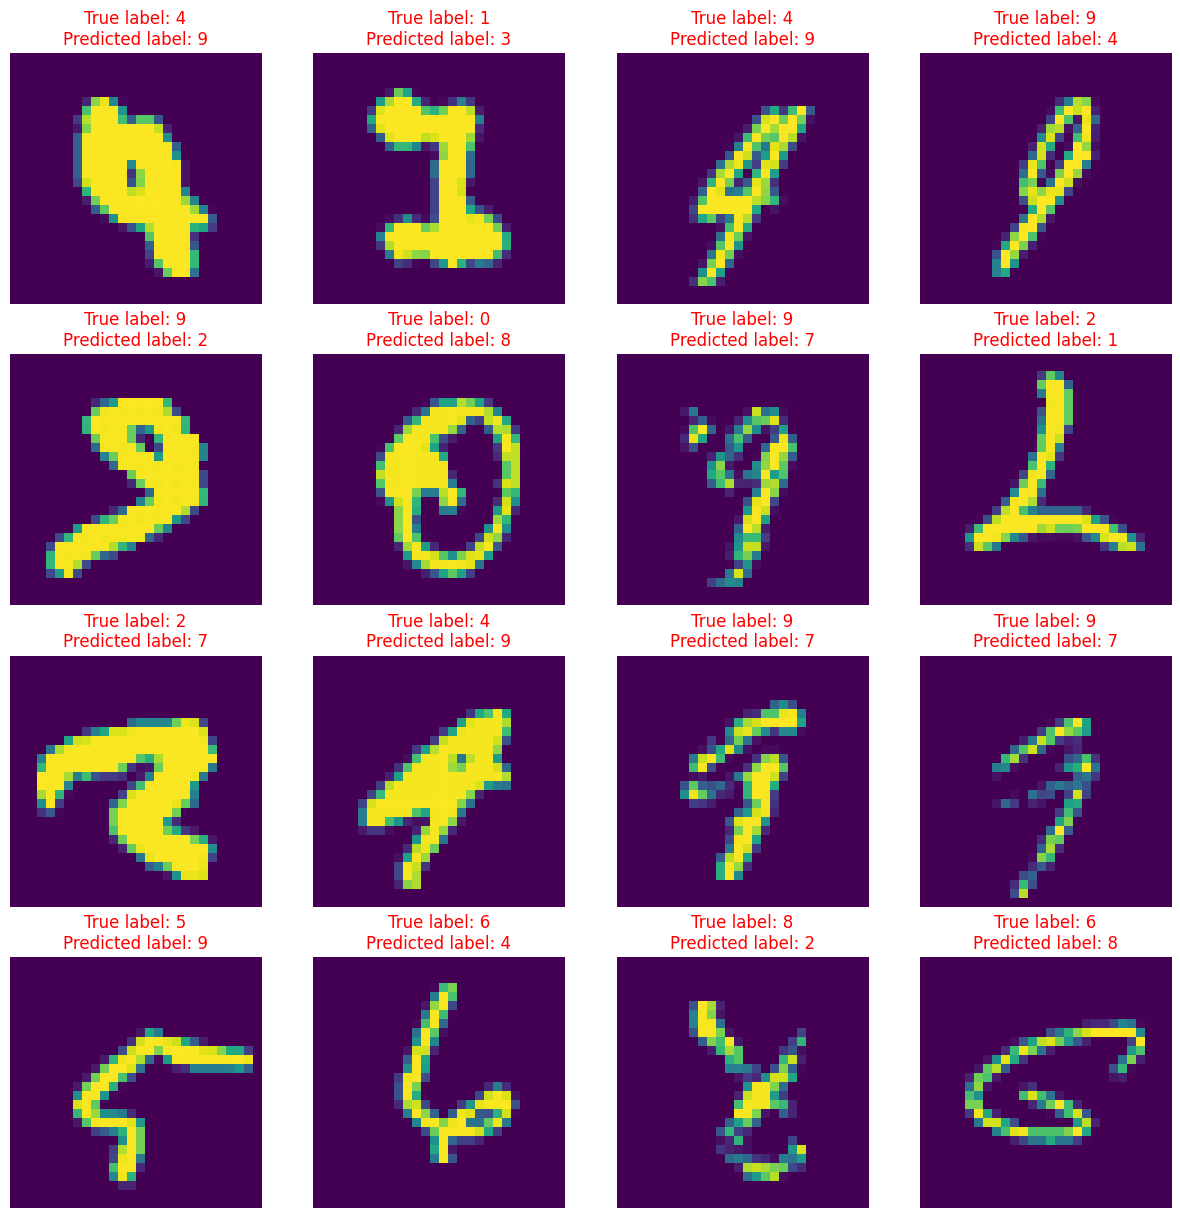

In [108]:
visualize_model_preds(images, np.array(top_16_most_wrong_predictions["True_label"]), np.array(top_16_most_wrong_predictions["Predicted_label"]))